In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import pickle

In [4]:
#C:\Users\Wilfred\Desktop\Min-Max
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_11_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
x_train = input_data[:100000,:]
x_test = input_data[100000:,:]

(105000, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_11_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_test = output_data[100000:,:]
print(output_data.shape)


(105000, 12)


In [6]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')> 0.99):
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
#callbacks = mycallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.4139 - accuracy: 0.8350 - val_loss: 0.3490 - val_accuracy: 0.8568
Epoch 2/100
100000/100000 - 1s - loss: 0.3068 - accuracy: 0.8744 - val_loss: 0.2761 - val_accuracy: 0.8868
Epoch 3/100
100000/100000 - 1s - loss: 0.2603 - accuracy: 0.8924 - val_loss: 0.2486 - val_accuracy: 0.8962
Epoch 4/100
100000/100000 - 1s - loss: 0.2378 - accuracy: 0.9003 - val_loss: 0.2314 - val_accuracy: 0.9023
Epoch 5/100
100000/100000 - 1s - loss: 0.2226 - accuracy: 0.9060 - val_loss: 0.2210 - val_accuracy: 0.9054
Epoch 6/100
100000/100000 - 1s - loss: 0.2113 - accuracy: 0.9099 - val_loss: 0.2093 - val_accuracy: 0.9092
Epoch 7/100
100000/100000 - 1s - loss: 0.2038 - accuracy: 0.9124 - val_loss: 0.2023 - val_accuracy: 0.9123
Epoch 8/100
100000/100000 - 1s - loss: 0.1966 - accuracy: 0.9149 - val_loss: 0.1954 - val_accuracy: 0.9146
Epoch 9/100
100000/100000 - 1s - loss: 0.1924 - accuracy: 0.9161 - val_loss: 0.1928 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0704 - accuracy: 0.9688 - val_loss: 0.0850 - val_accuracy: 0.9619
Epoch 78/100
100000/100000 - 1s - loss: 0.0702 - accuracy: 0.9690 - val_loss: 0.0850 - val_accuracy: 0.9606
Epoch 79/100
100000/100000 - 1s - loss: 0.0696 - accuracy: 0.9692 - val_loss: 0.0834 - val_accuracy: 0.9626
Epoch 80/100
100000/100000 - 1s - loss: 0.0692 - accuracy: 0.9694 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 81/100
100000/100000 - 1s - loss: 0.0677 - accuracy: 0.9703 - val_loss: 0.0807 - val_accuracy: 0.9634
Epoch 82/100
100000/100000 - 2s - loss: 0.0673 - accuracy: 0.9705 - val_loss: 0.0805 - val_accuracy: 0.9642
Epoch 83/100
100000/100000 - 2s - loss: 0.0667 - accuracy: 0.9707 - val_loss: 0.0811 - val_accuracy: 0.9644
Epoch 84/100
100000/100000 - 2s - loss: 0.0662 - accuracy: 0.9711 - val_loss: 0.0783 - val_accuracy: 0.9650
Epoch 85/100
100000/100000 - 1s - loss: 0.0654 - accuracy: 0.9715 - val_loss: 0.0823 - val_accuracy: 0.9628
Epoch 86/100
100000/100000 -

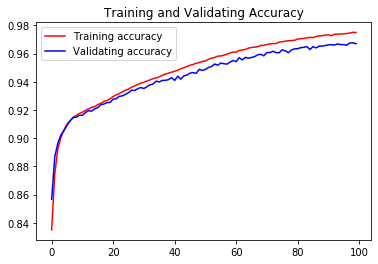

In [9]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()


In [11]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_11_2_model.h5')

In [34]:
print(tf.__version__)

2.0.0


In [14]:
model.save_weights('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\4_6_11_2')

In [16]:
model.load_weights('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\4_6_11_2')
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5000/1 - 0s - loss: 0.0792 - accuracy: 0.9635
Restored model, accuracy: 96.35%


In [22]:
print("Restored model, accuracy: {:.2f}%".format(100*acc))

Restored model, accuracy: 96.35%


In [23]:
print("Restored model, accuracy: {:.1f}%".format(100*acc))

Restored model, accuracy: 96.4%
